In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st

data = pd.read_fwf("dataFile.txt")
dt = np.array(data).tolist()
dt.sort()
#display(dt)
print("Обираються дані з 2016 до 2019 року курсу долара відносно гривні (за 100$)")

Обираються дані з 2016 до 2019 року курсу долара відносно гривні (за 100$)


In [2]:
#display(dt)
dt_array = np.array(dt)
R = dt_array[-1]-dt_array[0]
#print(R)
m = np.round(1+3.3221*math.log(len(dt)+1,10))
#print(m)
k = np.round(R/m)
#print(k)
end = np.round(dt_array[0]-k/2)
begin = end
#print(end)
mainTable = pd.DataFrame(columns = ['Start','End','Middle','Frequency1','Frequency2', 'Accumulated1', 'Accumulated2'], dtype=object)
priceStart=[]
priceEnd=[]
middle=[]
countWithin=[]
frequency=[]
countWithinAccunulated=[]
accumulatedFreaquency=[]
sum=0
for i in range(int(m+1)):
    start = end
    end = start + k
    avg = np.round((start+end)/2)
    counter=0
    for el in dt_array:
        if ((el>= start) and (el< end)):
            counter += 1
    sum += counter
    priceStart.append(int(start)/100)
    priceEnd.append(int(end)/100)
    middle.append(int(avg)/100)
    countWithin.append(counter)
    frequency.append(counter/100)
    countWithinAccunulated.append(sum)
    accumulatedFreaquency.append(sum/100)
    
mainTable['Start']=priceStart
mainTable['End']=priceEnd
mainTable['Middle']=middle
mainTable['Frequency1']=countWithin
mainTable['Frequency2']=frequency
mainTable['Accumulated1']=countWithinAccunulated
mainTable['Accumulated2']=accumulatedFreaquency
display(mainTable)
print(middle)

,Start,End,Middle,Frequency1,Frequency2,Accumulated1,Accumulated2
0,23.51,24.06,23.78,1,0.01,1,0.01
1,24.06,24.61,24.34,0,0.00,1,0.01
2,24.61,25.16,24.88,9,0.09,10,0.10
3,25.16,25.71,25.44,9,0.09,19,0.19
4,25.71,26.26,25.98,26,0.26,45,0.45
5,26.26,26.81,26.54,18,0.18,63,0.63
6,26.81,27.36,27.08,20,0.20,83,0.83
7,27.36,27.91,27.64,8,0.08,91,0.91
8,27.91,28.46,28.18,9,0.09,100,1.00


[23.78, 24.34, 24.88, 25.44, 25.98, 26.54, 27.08, 27.64, 28.18]


In [4]:
pre_mode = np.max(mainTable['Frequency1'])
index = countWithin.index(pre_mode)
x1, y1 = (priceStart[index], countWithin[index])
x2, y2 = (priceStart[index+1], countWithin[index+1])
x3, y3 = (priceEnd[index-1], countWithin[index-1])
x4, y4 = (priceEnd[index], countWithin[index])
divTo=(x1-x2)*(y3-y4)-(y1-y2)*(x3-x4)
Px, Py =(((x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4))/divTo,
          ((x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4))/divTo)
print(x1,y1,x2,y2,x3,y3,x4,y4)
print(Px, Py)


25.71 26 26.26 18 25.71 9 26.26 26
26.083999999999996 20.559999999999928


In [3]:
pre_mode_2 = 20
index1 = countWithin.index(pre_mode_2)
print(index1)
x11, y11 = (priceStart[index1], countWithin[index1])
x21, y21 = (priceStart[index1+1], countWithin[index1+1])
x31, y31 = (priceEnd[index1-1], countWithin[index1-1])
x41, y41 = (priceEnd[index1], countWithin[index1])
divTo=(x11-x21)*(y31-y41)-(y11-y21)*(x31-x41)
Px1, Py1 =(((x11*y21-y11*x21)*(x31-x41)-(x11-x21)*(x31*y41-y31*x41))/divTo,
          ((x11*y21-y11*x21)*(y31-y41)-(y11-y21)*(x31*y41-y31*x41))/divTo)
print(x11,y11,x21,y21,x31,y31,x41,y41)
print(Px1, Py1)


6
26.81 20 27.36 8 26.81 18 27.36 20
26.888571428571428 18.285714285714405


NameError: name 'x3' is not defined

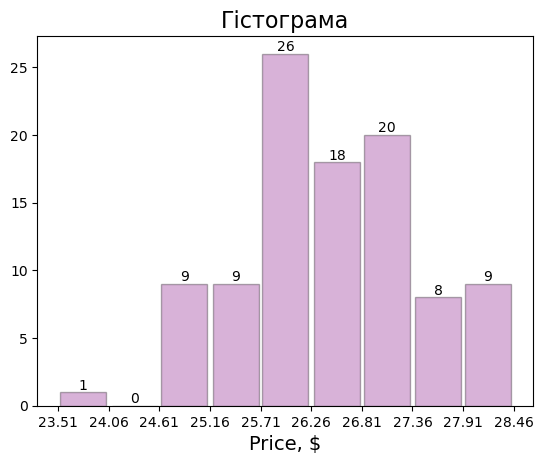

In [4]:
from matplotlib.patches import FancyArrowPatch

plt.bar(mainTable['Middle'], 
        mainTable['Frequency1'],
        width = 0.5,
        color = 'purple',
        ec = 'black', 
        alpha = 0.3)
priceStart.append(priceEnd[-1])
plt.xticks(priceStart, fontsize=10)
plt.xlabel('Price, $', fontsize=14)
plt.title('Гістограма', fontsize=16)
for i,v in enumerate(mainTable['Frequency1']):
    plt.text(mainTable['Middle'][i], v+0.2, str(v), ha='center')

plt.plot([x3, x4], [y3, y4],color='black', linestyle='--')
plt.plot([x1, x2], [y1, y2],color='black', linestyle='--')
plt.scatter(Px, Py, color='black',marker='o')
arrow = FancyArrowPatch((Px, Py), 
                        (Px, 0),
                        arrowstyle='->,head_width=0.5, head_length=1', 
                        mutation_scale = 15)
plt.gca().add_patch(arrow)
plt.text(Px, 2, f"Mo = {round(Px,2)}", ha='left')

plt.plot([x31, x41], [y31, y41],color='black', linestyle='--')
plt.plot([x11, x21], [y11, y21],color='black', linestyle='--')
plt.scatter(Px1, Py1, color='black',marker='o')
arrow = FancyArrowPatch((Px1, Py1), 
                        (Px1, 0),
                        arrowstyle='->,head_width=0.5, head_length=1', 
                        mutation_scale = 15)
plt.gca().add_patch(arrow)
plt.text(Px1+0.1, 4, f"Mo2 = {round(Px1,2)}", ha='left')


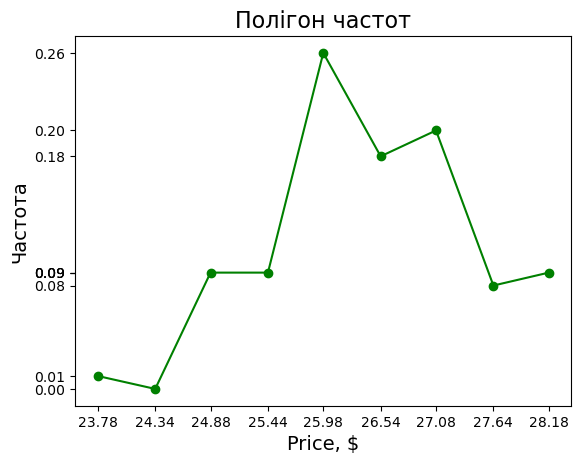

In [7]:
plt.xticks(middle, fontsize=10)
plt.yticks(frequency,)
plt.ylabel("Частота", fontsize=14)
plt.xlabel('Price, $', fontsize=14)
plt.title('Полігон частот', fontsize=16)
plt.plot(middle, frequency, 'go-')


In [5]:
priceEnd.insert(0,priceStart[0])
accumulatedFreaquency.insert(0, 0)
value = np.where(np.array(accumulatedFreaquency)>=0.5)[0]
x1, y1 = (priceStart[value[0]-1], accumulatedFreaquency[value[0]-1])
x2, y2 = (priceStart[value[0]], accumulatedFreaquency[value[0]])
y=0.5
x=(y-y1)*(x2-x1)/(y2-y1)+x1
print(x1,y1,x2,y2)

26.26 0.45 26.81 0.63


0

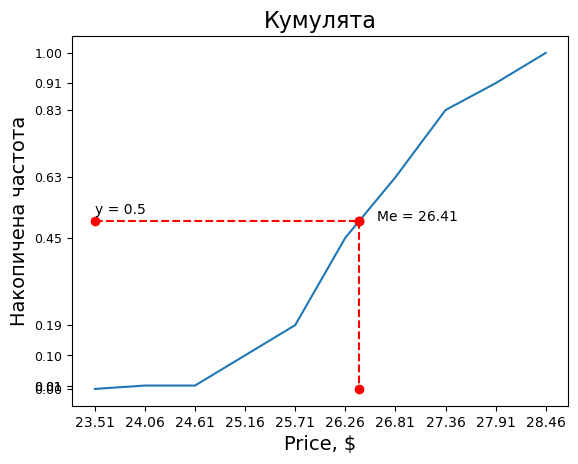

In [6]:
plt.xticks(priceEnd, fontsize=10)
plt.yticks(accumulatedFreaquency, fontsize = 9)
plt.ylabel("Накопичена частота", fontsize=14)
plt.xlabel('Price, $', fontsize=14)
plt.title('Кумулята', fontsize=16)
plt.plot(priceStart, accumulatedFreaquency, '-')
plt.text(priceStart[0], y+0.02, f"y = {y}")
plt.plot([priceStart[0], x], [y, y], color='r', linestyle='--', marker='o')
plt.text(x+0.2, y, f"Me = {round(x,2)}", ha='left')
plt.plot([x, x], [y, 0], color='r', linestyle='--', marker='o')

priceEnd.pop(0)
priceStart.pop(-1)
accumulatedFreaquency.pop(0)

In [10]:
x_avg = 0
l = len(middle)
for i in range(l):
    x_avg += middle[i]*countWithin[i]
x_avg /=100
print(f"Незміщена точкова оцінка генерального середнього: x*={round(x_avg,3)}")

s_square = 0
for i in range(l):
    s_square += countWithin[i]*(middle[i]-x_avg)**2
s_square /= 99
s=round(math.sqrt(s_square),4)
print(f"Незміщена точкова оцінка дисперсії: s^2 = {round(s_square,3)}")
print(f"Середнє квадратичне відхилення: s = {round(s,3)}")

Незміщена точкова оцінка математичного сподівання: x*=26.462
Незміщена точкова оцінка дисперсії: s^2 = 0.915
Середнє квадратичне відхилення: s = 0.957


In [11]:
v = (s/x)*100
print(f"Коефіцієнт варіації: v = {round(v,3)} (%)")


Коефіцієнт варіації: v = 3.621 (%)


{a: -3.12688414013168, b: 165.121399541050, c: -2161.92562810929}


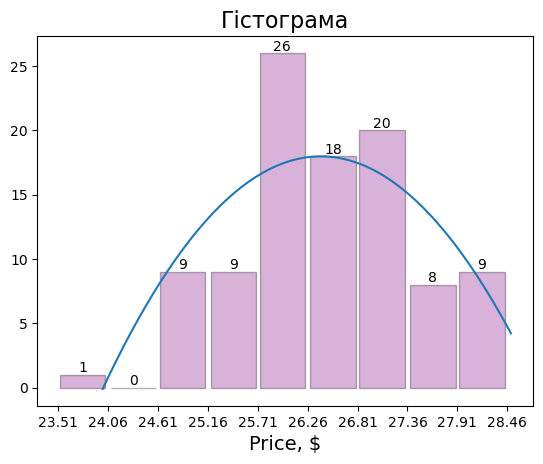

28.46

In [12]:
plt.bar(mainTable['Middle'], 
        mainTable['Frequency1'],
        width = 0.5,
        color = 'purple',
        ec = 'black', 
        alpha = 0.3)
priceStart.append(priceEnd[-1])
plt.xticks(priceStart, fontsize=10)
plt.xlabel('Price, $', fontsize=14)
plt.title('Гістограма', fontsize=16)
for i,v in enumerate(mainTable['Frequency1']):
    plt.text(mainTable['Middle'][i], v+0.2, str(v), ha='center')

x=np.array(middle)
y=np.array(countWithin)

import sympy as sp

a, b, c = sp.symbols('a b c')

equations = [
    sp.Eq(np.sum(c+b*x+a*x**2-y), 0),
    sp.Eq(np.sum((c+b*x+a*x**2-y)*x), 0),
    sp.Eq(np.sum((c+b*x+a*x**2-y)*x**2), 0),
]

solution = sp.solve(equations, (a,b,c))
a = solution[a]
b = solution[b]
c = solution[c]
print(solution)
def quadratic_function(a, b, c, x):
    return a * x**2 + b * x + c

# Задані значення параметрів a, b, c

# Задаємо діапазон значень x
x_values = np.linspace(24, 28.5, 100)

# Обчислюємо значення y для кожного x
y_values = quadratic_function(a, b, c, x_values)

# Малюємо графік
plt.plot(x_values, y_values)
plt.show()
priceStart.pop(-1)

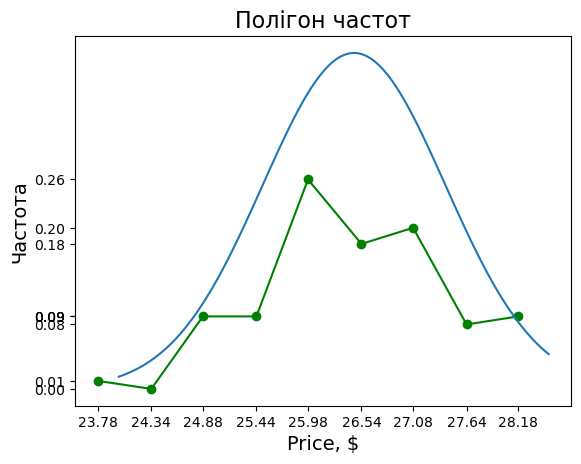

In [13]:
plt.xticks(middle, fontsize=10)
plt.yticks(frequency,)
plt.ylabel("Частота", fontsize=14)
plt.xlabel('Price, $', fontsize=14)
plt.title('Полігон частот', fontsize=16)
plt.plot(middle, frequency, 'go-')

x=np.array(middle)
y=np.array(countWithin)

def normal_function(x):
    return (np.exp(-(x-x_avg)**2/(2*s_square)))/(math.sqrt(2*math.pi)*s)

x_values = np.linspace(24, 28.5, 100)

# Обчислюємо значення y для кожного x
y_values = normal_function(x_values)

# Малюємо графік
plt.plot(x_values, y_values)
plt.show()

In [13]:
# Побудова довірчих інтегралів
import scipy.stats
n=8
gamma = 0.95
t = 1.96
sigma_x = math.sqrt(s_square/n)
delta = t * sigma_x
#print(delta)
print(f"Довірчі інтервали для генерального середнього:\n"
      f"{round(x_avg-delta, 2)}<=x0*<={round(x_avg+delta, 2)}\n")

l = (1-gamma)/2
r = (1+gamma)/2
k = n-1 # число ступенів свободи
xi1=scipy.stats.chi2.ppf(l,k)
xi2=scipy.stats.chi2.ppf(r,k)
print(xi1, xi2)
print(f"\nДовірчі інтервали для генеральної дисперсії:\n"
      f"{round(math.sqrt(n*s_square/xi2), 2)} <=σ^2<= {round(math.sqrt(n*s_square/xi1), 2)}")

Довірчі інтервали для генерального середнього:
25.8<=x0*<=27.12

1.6898691806773554 16.012764274629326

Довірчі інтервали для генеральної дисперсії:
0.68 <=σ^2<= 2.08


In [33]:
from scipy.integrate import quad
import math
def f(x):
    return np.exp(-x**2/2)
def integral(a, b):
    result, error = quad(f, a, b)
    return result/math.sqrt(2*math.pi)
xi=priceStart
xi1=priceEnd
ni=countWithin

for i in range(len(xi)-2):
    if(ni[i]<=5):
        ni[i]=ni[i]+ni[i+1]
        ni.pop(i+1)
        xi.pop(i+1)
        xi1.pop(i)
xi = np.array(xi)
xi1 = np.array(xi1)
ni = np.array(ni)
n=100
pi=[]
for i in range(len(xi)):
    val1 = integral(0, (xi1[i]-x_avg)/s)
    val2 = integral(0, (xi[i]-x_avg)/s)
    pi.append(val1-val2)
npi=np.array(pi)*n
ni_npi2=(ni-npi)**2
ni_npi2_npi=ni_npi2/npi
m=len(pi)
xi=np.append(xi,'-')
xi1=np.append(xi1,'-')
ni=np.append(ni, np.sum(ni))
pi=np.append(pi, np.sum(pi))
npi=np.append(npi, np.sum(npi))
ni_npi2= np.append(ni_npi2, '-')
ni_npi2_npi= np.append(ni_npi2_npi, np.sum(ni_npi2_npi))


pirsonTable = pd.DataFrame(columns = ['xi',
                                   'xi+1',
                                      'ni',
                                   'pi',
                                   'npi',
                                   '(ni-npi)^2',
                                   '(ni-npi)^2/npi'], dtype=object)
pirsonTable['xi']=xi
pirsonTable['xi+1']=xi1
pirsonTable['ni']=ni
pirsonTable['pi']=pi
pirsonTable['npi']=npi
pirsonTable['(ni-npi)^2']=ni_npi2
pirsonTable['(ni-npi)^2/npi']=ni_npi2_npi
display(pirsonTable)

,xi,xi+1,ni,pi,npi,(ni-npi)^2,(ni-npi)^2/npi
0,23.51,25.16,10,0.085710,8.570975,2.0421132048209447,0.238259
1,25.16,25.71,9,0.129152,12.915202,15.328808764805462,1.186881
2,25.71,26.26,26,0.200496,20.049557,35.40777020563868,1.766013
3,26.26,26.81,18,0.225635,22.563537,20.825868918240424,0.922988
4,26.81,27.36,20,0.184087,18.408723,2.5321618248203723,0.137552
5,27.36,27.91,8,0.108875,10.887496,8.337631398787916,0.765799
6,27.91,28.46,9,0.046672,4.667171,18.773410038715927,4.022439
7,-,-,100,0.980627,98.062661,-,9.039931


In [18]:
k=m-3
from scipy.stats import chi2
chival=chi2.ppf(0.95, k)
print(chival)

9.487729036781154


In [34]:
#Нехай ця генеральна сукупність має нормальний розподіл
#Параметри a, sigma^2 - невідомі
#Нехай a0=26
#H1:  xB>a0 (правостороння критична область)
from scipy.stats import ttest_ind
a0=26
n=8
T=(x_avg-a0)/s*math.sqrt(n-1)
t_kr = 2.36
print(f"T = {T}")
print(f"t_критичне = {t_kr}")
#гіпотеза приймається бо Т<t_кр
res, err = quad(f, 0, t_kr-T)
beta = round(0.5-res/math.sqrt(2*math.pi), 3)
print(f"β = {beta}, 1-β = {1-beta}")

n = math.ceil((t*s/beta)**2)
print(f"Мінімальний обcяг вибірки: n = {n}")

T = 1.277926927037993
t_критичне = 2.36
β = 0.14, 1-β = 0.86
Мінімальний обcяг вибірки: n = 180
